In [32]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tabla_completa = pd.read_csv('events.csv');
tabla_completa.head()

C:\Users\Santi\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
tabla_completa['event']=tabla_completa['event'].astype('category')
tabla_completa['timestamp']=pd.to_datetime(tabla_completa['timestamp'])

In [4]:
viewed_products_r = tabla_completa[tabla_completa['event']=='viewed product']
brand_listing_r = tabla_completa[tabla_completa['event']=='brand listing']
visited_site_r = tabla_completa[tabla_completa['event']=='visited site']
ad_campaig_hit_r = tabla_completa[tabla_completa['event']=='ad campaign hit']
generic_listing_r = tabla_completa[tabla_completa['event']=='generic listing']
searched_products_r = tabla_completa[tabla_completa['event']=='searched products']
checkout_r = tabla_completa[tabla_completa['event']=='checkout']
staticpage_r = tabla_completa[tabla_completa['event']=='staticpage']
conversion_r = tabla_completa[tabla_completa['event']=='conversion']
lead_r = tabla_completa[tabla_completa['event']=='lead']

In [5]:
conversion = conversion_r.drop(["url","skus","search_term","staticpage","campaign_source","search_engine","channel","new_vs_returning","city","region","country","device_type","screen_resolution","operating_system_version","browser_version"],axis='columns')
phones_bought = conversion[['person','model']]
phones_bought['buy'] = 1
phones_bought.head()

C:\Users\Santi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,person,model,buy
220,00204059,Motorola Moto X2,1
2282,00c13dee,Samsung Galaxy Core Plus Duos TV,1
2547,00fdbb4b,Samsung Galaxy S6 Flat,1
4245,0146a9df,iPhone 5s,1
6985,01db2fe6,Samsung Galaxy J5,1


In [6]:
viewed_products = viewed_products_r.drop(["url","skus","search_term","staticpage","campaign_source","search_engine","channel","new_vs_returning","city","region","country","device_type","screen_resolution","operating_system_version","browser_version"],axis='columns')
phones_seen = viewed_products[['person','model']]
phones_seen.head()

,person,model
2,0004b0a2,iPhone 5s
4,0006a21a,Samsung Galaxy S8
13,000a54b2,Motorola Moto Z Play
22,000a54b2,iPhone 7 Plus
26,000a54b2,iPhone 6S


In [23]:
phones_not_buy = phones_seen.merge(phones_bought, how='left', on= ['person','model'])
phones_not_buy = phones_not_buy.fillna(value=0).drop_duplicates()
phones_not_buy = phones_not_buy[phones_not_buy['buy']==0]
phones_not_buy.head()

,person,model,buy
0,0004b0a2,iPhone 5s,0.0
1,0006a21a,Samsung Galaxy S8,0.0
2,000a54b2,Motorola Moto Z Play,0.0
3,000a54b2,iPhone 7 Plus,0.0
4,000a54b2,iPhone 6S,0.0


In [75]:
phones=phones_not_buy.groupby('model')['person'].count()
phones = phones.reset_index()
phones = phones.sort_values(by='person', ascending=False)
phones = phones.head(10)
phones = phones.rename(index=str, columns={'model':'model','person':'amount'})
phones['amount'] = phones['amount'].astype('int32')
phones.head()

,model,amount
190,iPhone 6,6115
189,iPhone 5s,5140
192,iPhone 6S,4935
194,iPhone 7,3708
131,Samsung Galaxy S7,3435


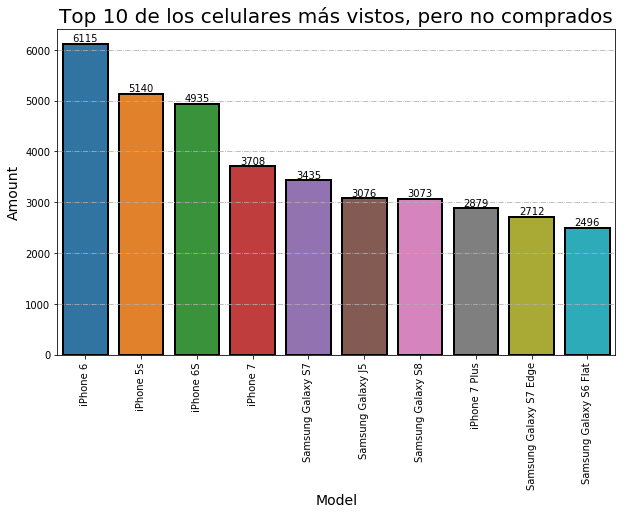

In [104]:
ax = sns.barplot(x=phones['model'], y=phones['amount'],edgecolor=(0,0,0), linewidth=2)
ax.set_title('Top 10 de los celulares más vistos, pero no comprados',fontsize=20)
ax.set_ylabel('Amount',fontsize=14)
ax.set_xlabel('Model',fontsize=14)
ax.grid(True, which='major', linestyle='-.', axis='y' )
ax.set_xticklabels(phones['model'],rotation=90)
ax.figure.set_figheight(6)
ax.figure.set_figwidth(10)

for patch in ax.patches:
    x=patch.get_bbox().get_points()[:,0]
    y=patch.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y+5), 
            ha='center', va='bottom') # set the alignment of the text